In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Mini_project_3rd_sem/stop-words.txt")

# Print the current column names
print("Original column names:", df.columns)

# Rename a specific column
df.rename(columns={'ಈ': 'stopwords'}, inplace=True)

# Print the updated column names
print("Updated column names:", df.columns)

# Save the updated DataFrame back to CSV
df.to_csv("/content/drive/MyDrive/Mini_project_3rd_sem/stop-words.txt", index=False)

Original column names: Index(['stopwords'], dtype='object')
Updated column names: Index(['stopwords'], dtype='object')


In [3]:
!pip install indic-nlp-library


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.2 MB/s eta 0:00:00


In [4]:
from tensorflow.keras.backend import clear_session
import tensorflow as tf
import gensim
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import re

# Install and import Indic NLP library for Kannada tokenization
# You may need to install this library via pip: pip install indic-nlp-library
from indicnlp.tokenize import indic_tokenize

# Load the CSV file containing your text data
file_path = '/content/drive/MyDrive/Mini_project_3rd_sem/kannada_news18_scrape(15-40-updated).csv'  # Replace with your text data CSV file path
df = pd.read_csv(file_path)

In [7]:
df.head(5)

,Unnamed: 0,Links,Title,Description,Content
0,0,https://kannada.news18.com/news/ayodhya-rama/b...,Ayodhya Ram Mandir: ಬಾಗಲಕೋಟೆ ಭೋವಿ ಗುರುಪೀಠದ ಇಮ್...,ಇಡೀ ಭಾರತ ದೇಶದಲ್ಲಿ ರಾಮನ ಅನೇಕ ಉಲ್ಲೇಖಗಳು ಸಿಗುತ್ತವ...,ಬಾಗಲಕೋಟೆ: ಅಯೋಧ್ಯಾ ರಾಮ ಮಂದಿರ ಉದ್ಘಾಟನೆ ಕಾರ್ಯಕ್ರಮ...
1,1,https://kannada.news18.com/news/ayodhya-rama/a...,Ayodhya Ram Mandir: ಅಂಬಾನಿ ಕುಟುಂಬದಿಂದ 2.51 ಕೋಟ...,ಈ ವೇಳೆ ಅಂಬಾನಿ ಕುಟುಂಬಸ್ಥರು ರಾಮಜನ್ಮಭೂಮಿ ತೀರ್ಥಕ್ಷ...,ಅಯೋಧ್ಯಾ: ಖ್ಯಾತ ಉದ್ಯಮಿ ಮುಕೇಶ್ ಅಂಬಾನಿ (Mukesh Am...
2,2,https://kannada.news18.com/news/ayodhya-rama/a...,"Rama Rajya: ರಾಮನ ಮುಂದೆ ಗುರಿಯಿತ್ತು, ಹಿಂದೆ ಗುರುವ...",ಗುರು ವಸಿಷ್ಠರು ದಶರಥ ಮಹಾರಾಜನ ನಾಲ್ವರು ಮಕ್ಕಳಿಗೂ ಅಂ...,ಕೋಟ್ಯಾಂತರ ಹಿಂದೂಗಳ (Hindus) ಕನಸು ಇನ್ನು ಕೆಲವೇ ದಿ...
3,3,https://kannada.news18.com/news/ayodhya-rama/p...,Ayodha Ram Lalla: ರಾಮನ ಮೂರ್ತಿ ಆಯ್ಕೆಯ ಅಧಿಕೃತ ದಿ...,ದೇವಸ್ಥಾನದಲ್ಲಿ ಸ್ಥಳಾವಕಾಶ ಕಡಿಮೆ ಇರುವುದರಿಂದ ಎಲ್ಲರ...,ಉಡುಪಿ: ಅಯೋಧ್ಯೆಯ ರಾಮಮಂದಿರದಲ್ಲಿ ಪ್ರತಿಷ್ಠಾಪಿಸಲಿರು...
4,4,https://kannada.news18.com/news/ayodhya-rama/t...,Ramayan: ಶ್ರೀಲಂಕಾದಲ್ಲಿದೆ ರಾಮಾಯಣದಲ್ಲಿ ಉಲ್ಲೇಖವಾಗ...,"1978 ರಲ್ಲಿ, ಶ್ರೀ ಎಂಬ ಗೌರವಾರ್ಥ ಪದವನ್ನು ಸೇರಿಸಿ ಶ...","ಹಿಂದೂ ಮಹಾಸಾಗರದಲ್ಲಿ, ಭಾರತದ ದಕ್ಷಿಣದಲ್ಲಿ ಒಂದು ದ್ವ..."


In [8]:
df.shape

(16975, 5)

In [9]:
# Assuming the column containing the text is named 'Content'
documents = df['Content'].tolist()
# Ensure each document is a string
documents = [str(doc) if isinstance(doc, str) else '' for doc in documents]

In [10]:
from sklearn.model_selection import train_test_split
X = df[['Title', 'Content']]  # Select the feature columns
y = df['Description']  # Select the target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(13580, 2)

In [12]:
X_test.shape

(3395, 2)

In [13]:
y_train.shape

(13580,)

In [14]:
X_train.head(10)

,Title,Content
13599,Pawan kalyan: ಅಮಿತ್ ಶಾ-ಪವನ್ ಕಲ್ಯಾಣ್ ಭೇಟಿ! ಗೃಹ ...,ಆಂಧ್ರಪ್ರದೇಶ ರಾಜಕೀಯದಲ್ಲಿ ಪ್ರಮುಖ ವಿರೋಧ ಪಕ್ಷಗಳಿಗೆ...
16899,Banana Peel: ಮುಖದ ಮೇಲಿನ ಸುಕ್ಕುಗಳಿಂದ ಮುಕ್ತಿ ಪಡೆ...,ಇತ್ತೀಚಿನ ದಿನಗಳಲ್ಲಿ ಸೌಂದರ್ಯಕ್ಕೆ ಸಂಬಂಧಿಸಿದ ವಿಷಯಗ...
8019,Elon Musk Twitter: ಸದ್ಯ ಟ್ವಿಟರ್​ ಖರೀದಿಸಲ್ಲ ಎಂದ...,44 ಶತಕೋಟಿ ಡಾಲರ್‌ಗೆ ಟ್ವಿಟರ್ ಖರೀದಿಸಿದ್ದ ಟೆಸ್ಲಾ ಮ...
16370,Knowledge Story: ಒಂದು ಲೀಟರ್ ಇಲಿ ಹಾಲು ಕುಡಿದ್ರೆ ...,"ಸಾಮಾನ್ಯವಾಗಿ ಹಸು, ಎಮ್ಮೆ, ಕುರಿ, ಕತ್ತೆ, ಸೋಯಾ ಹಾಲು..."
3578,200 Crore Donate: ಜೀವನ ಪರ್ಯಂತ ಸಂಪಾದಿಸಿದ್ದ 200 ...,ಅಹ್ಮದಾಬಾದ್: ಗುಜರಾತ್​ನ (Gujarat) ಉದ್ಯಮಿಯೊಬ್ಬರು ...
9282,Viral Video: ಮೀನಿನ ಹೊಟ್ಟೆಯಲ್ಲಿತ್ತು ಓಪನ್ ಮಾಡದ ವ...,ಮೀನಿನ ಹೊಟ್ಟೆಯಲ್ಲಿ ವಿಸ್ಕಿ ಬಾಟಲ್ ಸಿಕ್ಕಿದರೆ ಅದಕ್ಕ...
7700,"Ashes 2023, ENG vs AUS: ಕುತೂಹಲ ಘಟ್ಟದತ್ತ ಆ್ಯಶಸ್...","ಆ್ಯಶಸ್ ಸರಣಿ 2023ರ (Ashes 2023,) ಮೊದಲ ಪಂದ್ಯ ಎಜ್..."
6480,Big Stars: ಸ್ಯಾಂಡಲ್‌ವುಡ್‌ ಸೂಪರ್ ಸ್ಟಾರ್‌ಗಳ ಬೇಬಿ...,ಸ್ಯಾಂಡಲ್‌ವುಡ್‌ ಸೂಪರ್ ಸ್ಟಾರ್ ಬಾಲ್ಯದ ಫೋಟೋಗಳು (Ch...
16534,Milk For Health: ಹಾಲನ್ನು ಬಿಸಿ ಇದ್ದಾಗ ಕುಡಿಯಬೇಕೋ...,ದೇಹಕ್ಕೆ ಬೇಕಾದ ಎಲ್ಲಾ ರೀತಿಯ ಪೋಷಕಾಂಶಗಳನ್ನು ಪಡೆಯಲು...
4105,Ayodhya Surya Tilak: ಏನಿದು ರಾಮಲಲ್ಲಾ ವಿಗ್ರಹದ ಮೇ...,ಶ್ರೀರಾಮನ ಹಬ್ಬವಿಂದು. ದೇಶದೆಲ್ಲೆಡೆ ರಾಮನ ಕುರಿತಾದ ವ...


In [15]:
y_train.head(10)

,Description
13599,Pawan kalyan | Delhi: ಬಿಜೆಪಿ ನಾಯಕರೊಂದಿಗೆ ಜನಸೇನ...
16899,ಬಾಳೆಹಣ್ಣಿನ ಸಿಪ್ಪೆ ಸುಕ್ಕುಗಳನ್ನು ತೆಗೆದು ಹಾಕಲು ಸಹ...
8019,ಟ್ವಿಟರ್ ಮೊದಲ ತ್ರೈಮಾಸಿಕದಲ್ಲಿ ಅದರ ಹಣಗಳಿಸಬಹುದಾದ ದ...
16370,"ಇಲಿ ಹಾಲು ತುಂಬಾ ದುಬಾರಿ ಆಗಿದ್ದು, ಇದನ್ನು ಪಡೆಯುವುದ..."
3578,ಭಾವೇಶ್ ಭಾಯ್ ಭಂಡಾರಿ ಅವರ ಕುಟುಂಬ ಜೈನ ಸಮುದಾಯದತ್ತ ಒ...
9282,ಮೀನುಗಾರನೊಬ್ಬ ಬೀಸಿದ ಬಲೆಯಲ್ಲಿ ಸಿಲುಕಿಕೊಂಡ ಮೀನಿನ ಹ...
7700,Ashes 2023: ಎರಡನೇ ಇನ್ನಿಂಗ್ಸ್‌ನಲ್ಲಿ ಡೇವಿಡ್ ವಾರ್...
6480,ಸ್ಯಾಂಡಲ್‌ವುಡ್‌ ಸೂಪರ್ ಸ್ಟಾರ್‌ಗಳು ಬಾಲ್ಯದಲ್ಲಿ ಹೇಗ...
16534,ಡೈರಿ ಉತ್ಪನ್ನಗಳನ್ನು ನೋಡುವುದಾದರೆ ಅದರಲ್ಲಿ ಮುಖ್ಯವಾ...
4105,ಅಯೋಧ್ಯೆಯಲ್ಲಿ ಹೊಸದಾಗಿ ನಿರ್ಮಿಸಲಾದ ರಾಮಮಂದಿರದೊಳಗೆ ...


In [16]:
X_train.describe()

,Title,Content
count,13580,13568
unique,13580,13548
top,Pawan kalyan: ಅಮಿತ್ ಶಾ-ಪವನ್ ಕಲ್ಯಾಣ್ ಭೇಟಿ! ಗೃಹ ...,ಮೇಷ ರಾಶಿ: ವೃತ್ತಿ ವ್ಯವಹಾರದಲ್ಲಿ ಆರ್ಥಿಕ ಲಾಭವಾಗಲಿದ...
freq,1,7


In [17]:
y_train.describe()

,Description
count,13580
unique,13420
top,ಭಾಗ್ಯಲಕ್ಷ್ಮೀ ಕಲರ್ಸ್​​ ಕನ್ನಡ ವಾಹಿನಿಯಲ್ಲಿ ಪ್ರಸಾರ...
freq,34


In [18]:
# Load stopwords CSV
stopwords_file_path = '/content/drive/MyDrive/Mini_project_3rd_sem/stop-words.txt'  # Replace with stopwords CSV file path
stopwords_df = pd.read_csv(stopwords_file_path)

In [19]:
stopwords_df

,stopwords
0,ಆದರೆ
1,ಎಂದು
2,ಅವರ
3,ಮತ್ತು
4,ಎಂಬ
...,...
96,ಮೂರು
97,ಅಥವಾ
98,ಜೊತೆಗೆ
99,ಹೆಸರು


In [20]:
# Assuming the stopwords are in a column named 'stopwords'
stop_words = set(stopwords_df['stopwords'].tolist())

In [21]:
# import re
# from indicnlp.tokenize import indic_tokenize

# def preprocess_tokenize(text):
#     """
#     Preprocess and clean the text by removing digits, special characters, unwanted punctuations,
#     English alphabets, and reducing multiple spaces or hyphens to a single space.
#     """
#     # Convert text to string (if not already)
#     text = str(text)

#     # Remove digits
#     text = re.sub(r'\d+', '', text)

#     # Replace special characters and unwanted patterns
#     text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\u200d', ' ')
#     text = text.replace("—", " ")
#     # text = re.sub(r"(__+)", ' ', text)  # Replace multiple underscores with a space
#     # text = re.sub(r"(--+)", ' ', text)  # Replace multiple hyphens with a space
#     # text = re.sub(r"(~~+)", ' ', text)  # Replace multiple tildes with a space
#     # text = re.sub(r"(\+\++)", ' ', text)  # Replace multiple pluses with a space
#     # text = re.sub(r"(\.\.+)", ' ', text)  # Replace multiple dots with a space


#     text=re.sub(r'@\w+','',text)
#     text=re.sub(r'$', '', text)
#     text= re.sub(r'’','', text )
#     text=re.sub('<.*?>','',text)
#     text=re.sub(r'http\S+', '', text)
#     text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower()
#     # Remove unwanted punctuations and symbols
#     text = re.sub(r"[^\w\s]", ' ', text).lower()  # Removes any non-alphanumeric character except whitespace

#     # Remove English alphabets
#     text = re.sub(r"[a-zA-Z]", ' ', text).lower()

#     # Replace multiple spaces with a single space
#     text = re.sub(r"\s+", ' ', text).lower()

#     # Strip leading and trailing spaces
#     text = text.strip()

#     return text

# # Preprocess the Kannada text (remove stopwords)
# texts = []
# for doc in documents:
#     # Preprocess and clean the document
#     cleaned_doc = preprocess_tokenize(doc)

#     # Tokenize the Kannada document using Indic NLP's tokenization
#     tokens = indic_tokenize.trivial_tokenize(cleaned_doc)

#     # Remove stopwords and non-alphanumeric tokens
#     filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

#     # Append the cleaned tokens to the texts list
#     texts.append(filtered_tokens)


In [22]:
import re
from indicnlp.tokenize import indic_tokenize

def preprocess_tokenize(text):
    """
    Preprocess and clean the text by removing digits, special characters, unwanted punctuations,
    English alphabets, and reducing multiple spaces or hyphens to a single space.
    Uses replace() more extensively.
    """
    text = str(text)  # Ensure it's a string

    # More replacements using chained replace calls for efficiency
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\u200d', ' ')
    text = text.replace("—", " ").replace('’', '') #combined replace for '—' and '’'

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (@words)
    text = re.sub(r'@\w+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove special characters and unwanted punctuations using replace

    chars_to_remove = "@!?.,;:'$\"₹()[]{}<>।॥-|/*0123456789\u200C\u00A0\u200d-"  # Include $ here
    for char in chars_to_remove:
        text = text.replace(char, ' ')

    # Remove non-alphanumeric and convert to lowercase (after other cleaning)
    text = re.sub(r"[^\w\s]", ' ', text).lower()  #Keep this after the character replacement loop

    # Remove English alphabets (after other cleaning)
    text = re.sub(r"[a-zA-Z]", ' ', text).lower()

    # Replace multiple spaces with a single space
    text = re.sub(r"\s+", ' ', text).lower()

    # Strip leading and trailing spaces
    text = text.strip()

    return text


# Example usage (assuming 'documents' and 'stop_words' are defined):
texts = []
for doc in documents:
    cleaned_doc = preprocess_tokenize(doc)
    tokens = indic_tokenize.trivial_tokenize(cleaned_doc)
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    texts.append(filtered_tokens)

In [23]:
# Create a dictionary
dictionary = corpora.Dictionary(texts)
# Create a bag-of-words (BoW) corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [24]:
from sklearn.model_selection import train_test_split
from gensim.matutils import corpus2dense
import numpy as np

# Apply TF-IDF weighting
from gensim.models import TfidfModel
tfidf_model = TfidfModel(corpus)
tfidf_corpus = tfidf_model[corpus]

# Ensure tfidf_corpus is a list of (term_id, term_weight) tuples
X_train, X_test = train_test_split(list(tfidf_corpus), test_size=0.2, random_state=42)

# Instead of splitting the corpus, use the entire corpus for training the LDA model
#X_train = list(tfidf_corpus)  # Use the entire corpus for training
#X_test = list(tfidf_corpus) # Use the entire corpus for testing

# Note: This assumes you want to evaluate the model on the same data it was trained on.
# For a more realistic evaluation, you'd need more documents in your corpus.

In [25]:
from gensim.models import LdaModel
from nltk.tokenize import sent_tokenize

# Train the LDA model
lda_model = LdaModel(corpus=X_train, num_topics=3, id2word=dictionary, passes=15)

In [26]:
# Get the top words from each topic
topics = lda_model.print_topics(num_words=5)
topic_keywords = {}

for topic_num, topic in lda_model.print_topics(num_words=5):
    topic_keywords[topic_num] = [word for word, _ in lda_model.show_topic(topic_num, topn=5)]

In [27]:
# Function to extract sentences containing the most relevant words for a dominant topic
def get_summary_for_document(doc, dominant_topic, topic_keywords):
    keywords = topic_keywords[dominant_topic]  # Get the keywords for the dominant topic

    # Try using NLTK's sent_tokenize, fallback to simple split if there's an issue
    try:
        sentences = sent_tokenize(doc)  # Tokenize the document into sentences
    except LookupError:
        # If punkt is not found, use a simple split (fallback)
        sentences = doc.split(". ")

    summary_sentences = []

    # For each sentence, check if it contains any of the keywords
    for sentence in sentences:
        if any(keyword in sentence for keyword in keywords):
            summary_sentences.append(sentence)

    # Return the summary by joining the selected sentences
    return " ".join(summary_sentences)

In [30]:
import os

# Set the path inside your Google Drive
save_path = "/content/drive/MyDrive/Mini_project_3rd_sem/document_summaries.txt"

summaries = []

with open(save_path, "w", encoding="utf-8") as file:
    for doc_index in range(len(X_test)):
        # Get the topics for the document
        doc_topics = lda_model[X_test[doc_index]]  # Directly use the TF-IDF representation

        # Get the dominant topic (the one with the highest probability)
        dominant_topic = max(doc_topics, key=lambda x: x[1])[0]

        # Generate the summary for the document based on the dominant topic
        summary = get_summary_for_document(documents[doc_index], dominant_topic, topic_keywords)
        summaries.append(summary)

        # Write to file
        file.write(f"Document {doc_index} Summary:\n{summary}\n\n")

        # Print output (optional)
        print(f"Document {doc_index} Summary: {summary}\n")

print(f"\n Summaries saved to: {save_path}")

Output hidden; open in https://colab.research.google.com to view.

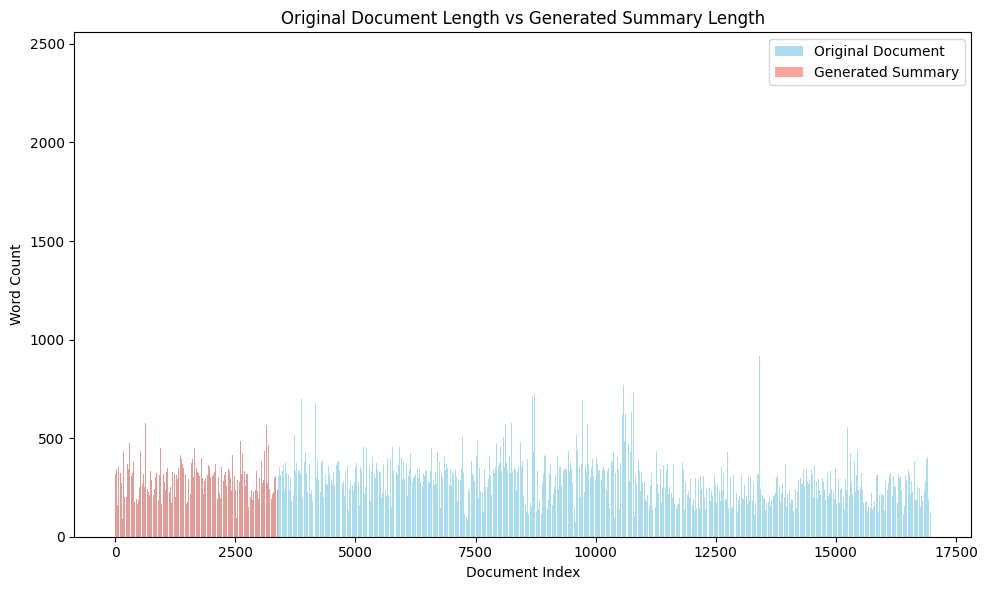

In [31]:
# Compare document vs summary length
original_lengths = [len(doc.split()) for doc in documents]
summary_lengths = [len(summary.split()) for summary in summaries]

plt.figure(figsize=(10,6))
plt.bar(range(len(original_lengths)), original_lengths, color='skyblue', alpha=0.7, label='Original Document')
plt.bar(range(len(summary_lengths)), summary_lengths, color='salmon', alpha=0.7, label='Generated Summary')
plt.xlabel('Document Index')
plt.ylabel('Word Count')
plt.title('Original Document Length vs Generated Summary Length')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [32]:
from gensim.models import CoherenceModel

# Compute coherence score for LDA model
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"LDA Coherence Score: {coherence_score:.4f}")

LDA Coherence Score: 0.3761


In [33]:
# Compute Perplexity score
perplexity = lda_model.log_perplexity(corpus)
print(f"LDA Perplexity: {perplexity:.4f}")

LDA Perplexity: -7.9665


In [34]:
compression_rates = [len(summaries[i].split()) / len(documents[i].split()) if len(documents[i].split()) else 0 for i in range(len(summaries))]
avg_compression = np.mean(compression_rates)

print(f"Average Compression Rate: {avg_compression:.2%}")

Average Compression Rate: 99.88%


In [35]:

pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=b214483072063940fcee0c6a84ec89e3796cfdae7435bb55bc4883fdbbcdac43
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [36]:
pip install rouge

In [37]:
import sys

from rouge import Rouge

# Increase the recursion limit
sys.setrecursionlimit(10000)  # Set a higher limit, adjust if needed

rouge = Rouge()
reference_summaries = y_test.tolist()  # Convert reference summaries to a list

# Filter out empty summaries and corresponding reference summaries
filtered_summaries = []
filtered_reference_summaries = []
for i in range(len(summaries)):
    if summaries[i]:  # Check if the summary is not empty
        filtered_summaries.append(summaries[i])
        filtered_reference_summaries.append(reference_summaries[i])

# Calculate ROUGE scores using the filtered lists
scores = rouge.get_scores(filtered_summaries, filtered_reference_summaries)

print(scores)


[{'rouge-1': {'r': 0.13333333333333333, 'p': 0.038461538461538464, 'f': 0.059701489062152134}, 'rouge-2': {'r': 0.06666666666666667, 'p': 0.017094017094017096, 'f': 0.02721088110509549}, 'rouge-l': {'r': 0.13333333333333333, 'p': 0.038461538461538464, 'f': 0.059701489062152134}}, {'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}, {'rouge-1': {'r': 0.038461538461538464, 'p': 0.00390625, 'f': 0.0070921969076006165}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.038461538461538464, 'p': 0.00390625, 'f': 0.0070921969076006165}}, {'rouge-1': {'r': 0.058823529411764705, 'p': 0.007936507936507936, 'f': 0.013986011891046332}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.058823529411764705, 'p': 0.007936507936507936, 'f': 0.013986011891046332}}, {'rouge-1': {'r': 0.2222222222222222, 'p': 0.013186813186813187, 'f': 0.024896264502591255}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rou

In [38]:


from rouge_score import rouge_scorer
import numpy as np

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)

rouge_1_scores = []
rouge_2_scores = []

# Evaluate the generated summaries against the original documents
for i in range(len(summaries)):
    generated_summary = summaries[i]
    original_document = documents[i]  # Use the original document as the reference

    # Compute ROUGE scores
    scores = scorer.score(original_document, generated_summary)
    rouge_1_scores.append(scores['rouge1'].fmeasure)
    rouge_2_scores.append(scores['rouge2'].fmeasure)

# Print average ROUGE scores
print(f"Average ROUGE-1 Score: {np.mean(rouge_1_scores):.4f}")
print(f"Average ROUGE-2 Score: {np.mean(rouge_2_scores):.4f}")


Average ROUGE-1 Score: 0.9938
Average ROUGE-2 Score: 0.9750


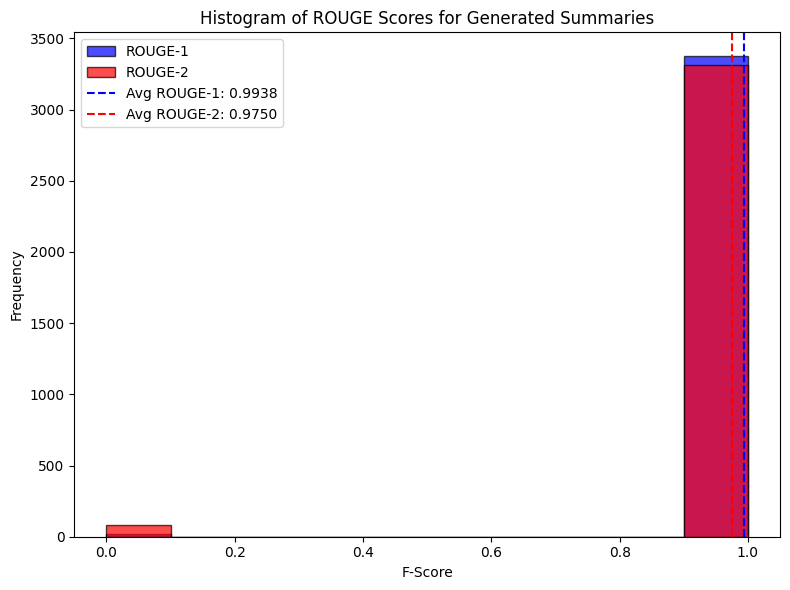

In [39]:
# Calculate average scores
average_rouge_1 = np.mean(rouge_1_scores)
average_rouge_2 = np.mean(rouge_2_scores)

# Plotting histograms for ROUGE-1 and ROUGE-2 scores
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram for ROUGE-1 scores
ax.hist(rouge_1_scores, bins=10, alpha=0.7, label='ROUGE-1', color='b', edgecolor='black')

# Plot histogram for ROUGE-2 scores
ax.hist(rouge_2_scores, bins=10, alpha=0.7, label='ROUGE-2', color='r', edgecolor='black')

# Add average lines for ROUGE-1 and ROUGE-2
ax.axvline(average_rouge_1, color='b', linestyle='--', label=f'Avg ROUGE-1: {average_rouge_1:.4f}')
ax.axvline(average_rouge_2, color='r', linestyle='--', label=f'Avg ROUGE-2: {average_rouge_2:.4f}')

# Add labels and title
ax.set_xlabel('F-Score')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of ROUGE Scores for Generated Summaries')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [40]:
from nltk.translate.bleu_score import sentence_bleu
import numpy as np

# Initialize BLEU scores
bleu_scores = []

# Evaluate the generated summaries against the original documents
for i in range(len(summaries)):
    generated_summary = summaries[i]
    original_document = documents[i]  # Use the original document as the reference

    # Tokenize the generated summary and the original document into words
    generated_summary_tokens = generated_summary.split()  # You can use nltk.word_tokenize if you prefer tokenization
    original_document_tokens = original_document.split()  # Same here

    # Compute BLEU score for each summary-document pair
    bleu_score = sentence_bleu([original_document_tokens], generated_summary_tokens)
    bleu_scores.append(bleu_score)

# Print average BLEU score
print(f"Average BLEU Score: {np.mean(bleu_scores):.4f}")


Average BLEU Score: 0.8102


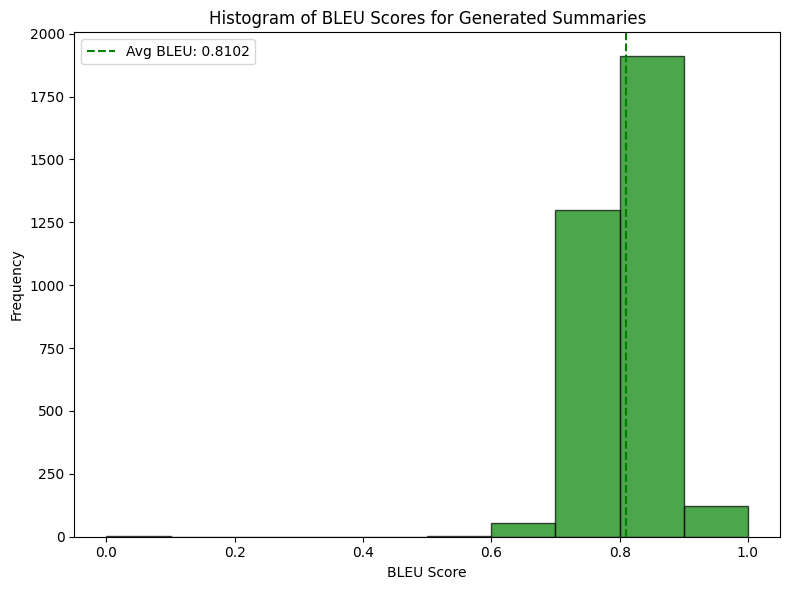

In [41]:
# Calculate average BLEU score
average_bleu = np.mean(bleu_scores)

# Plotting histogram for BLEU scores
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram for BLEU scores
ax.hist(bleu_scores, bins=10, alpha=0.7, color='g', edgecolor='black')

# Add average line for BLEU score
ax.axvline(average_bleu, color='g', linestyle='--', label=f'Avg BLEU: {average_bleu:.4f}')

# Add labels and title
ax.set_xlabel('BLEU Score')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of BLEU Scores for Generated Summaries')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [42]:

import numpy as np
from nltk.translate import meteor_score
nltk.download('wordnet')
# Tokenize using simple space-based splitting
def simple_tokenize(text):
    return text.split()

# Initialize METEOR scores
meteor_scores_list = []

# Evaluate the generated summaries against the original documents
for i in range(len(summaries)):
    generated_summary = summaries[i]
    original_document = documents[i] # Use the original document as the reference

    # Tokenize the generated summary and original document
    tokenized_generated_summary = simple_tokenize(generated_summary)
    tokenized_original_document = simple_tokenize(original_document)

    # Compute METEOR score for each summary-document pair
    meteor_score_value = meteor_score.meteor_score([tokenized_original_document], tokenized_generated_summary)
    meteor_scores_list.append(meteor_score_value)

# ✅ Compute average METEOR score
average_meteor = np.mean(meteor_scores_list) # Make sure this is computed!
print(f"Average METEOR Score: {average_meteor:.4f}")

[nltk_data] Downloading package wordnet to /root/nltk_data...


Average METEOR Score: 0.9249


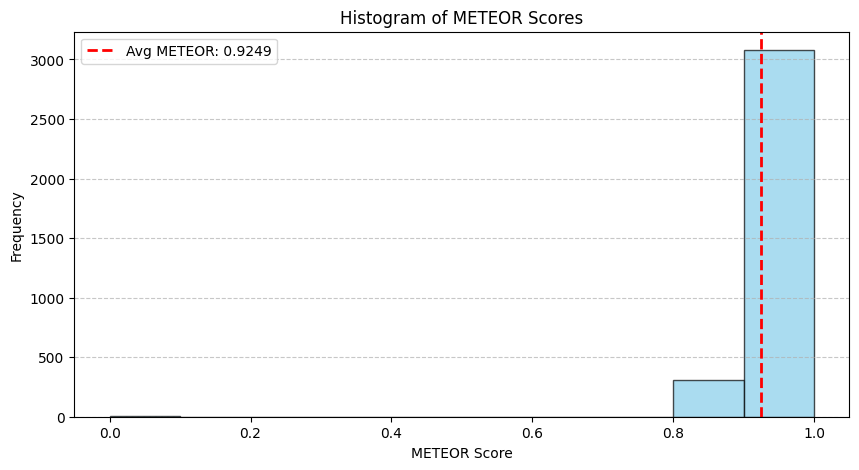

In [43]:
import matplotlib.pyplot as plt

#í Plot METEOR Score Histogram
plt.figure(figsize=(10, 5))
plt.hist(meteor_scores_list, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# ✅ Ensure average_meteor is defined before using it
plt.axvline(x=average_meteor, color='r', linestyle='--', linewidth=2, label=f"Avg METEOR: {average_meteor:.4f}")

# Labels and title
plt.xlabel("METEOR Score")
plt.ylabel("Frequency")
plt.title("Histogram of METEOR Scores")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

In [44]:
from rouge_score import rouge_scorer, scoring
import numpy as np

def evaluate_summaries(generated_summaries, reference_summaries):
    """
    Evaluate generated summaries against reference summaries using ROUGE metrics.

    Args:
    - generated_summaries (list): List of generated summaries.
    - reference_summaries (list): List of ground truth summaries.

    Returns:
    - dict: ROUGE scores (ROUGE-1, ROUGE-2, ROUGE-L) for precision, recall, and F1.
    """
    # Initialize a scorer for ROUGE-1, ROUGE-2, and ROUGE-L
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    aggregator = scoring.BootstrapAggregator()

    # Compute scores for each pair of generated and reference summaries
    for gen, ref in zip(generated_summaries, reference_summaries):
        scores = scorer.score(ref, gen)
        aggregator.add_scores(scores)

    # Aggregate the results and return average scores
    results = aggregator.aggregate()
    return {
        metric: {
            "precision": results[metric].mid.precision,
            "recall": results[metric].mid.recall,
            "f1_score": results[metric].mid.fmeasure,
        }
        for metric in results
    }

# Example usage
# Assuming `summaries` contains the generated summaries and `y_test` contains reference summaries
reference_summaries = y_test.tolist()  # Convert reference summaries to a list
results = evaluate_summaries(summaries, reference_summaries)

# Print evaluation results
# Prepare data for classification-report-like output
report_data = {
    "Metric": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
}

# Add the metrics to the report data
for metric, scores in results.items():
    report_data["Metric"].append(metric.upper())
    report_data["Precision"].append(f"{scores['precision']:.2f}")
    report_data["Recall"].append(f"{scores['recall']:.2f}")
    report_data["F1-Score"].append(f"{scores['f1_score']:.2f}")

# Convert to DataFrame for tabular display
report_df = pd.DataFrame(report_data)

# Print the report
print("ROUGE Evaluation Report:\n")

print(report_df.to_string(index=False))


ROUGE Evaluation Report:

Metric Precision Recall F1-Score
ROUGE1      0.00   0.03     0.01
ROUGE2      0.00   0.00     0.00
ROUGEL      0.00   0.03     0.01
